In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# 读取数据集er546767EW
#data = pd.read_csv(r"E:\大学\综合项目实践\013minmax.csv")
data=pd.read_csv(r"E:\大学\综合项目实践\归一&特征选择&bp\Z-Score标准化.csv")
# 查看数据集的前几行以了解数据结构
print(data.head())

         Date  Discharge      Dayl      Prcp      Srad  Swe      Tmax  \
0  2000-01-08       49.0 -1.375809 -0.269642 -1.184460  NaN -0.992849   
1  2000-01-09       46.0 -1.375809 -0.507515 -1.134343  NaN -1.058464   
2  2000-01-10       83.0 -1.331552 -0.507515 -1.269985  NaN -0.760459   
3  2000-01-11      120.0 -1.331552  1.941103 -1.862290  NaN -0.700312   
4  2000-01-12       79.0 -1.331552 -0.347589 -1.359452  NaN -0.762282   

       Tmin        Vp  Prcp_lag_1  ...  Tmax_lag_6  Srad_lag_6  \
0 -0.729902 -0.836319   -0.507515  ...   -0.501052   -0.781345   
1 -0.751663 -0.847891   -0.269642  ...   -0.075040   -1.073961   
2 -0.350065 -0.583796   -0.507515  ...   -0.078697   -1.324472   
3 -0.016719 -0.321015   -0.507515  ...   -0.061327   -0.978066   
4 -0.338195 -0.575617    1.941103  ...   -1.386900   -0.832023   

   Discharge_lag_6  Prcp_lag_7  Tmax_lag_7  Srad_lag_7  Discharge_lag_7  \
0        -0.532577   -0.508870   -0.997933   -0.857839        -0.531815   
1        -0.48

In [4]:
# 提取特征和目标变量
#X = data[['Dayl', 'Prcp', 'Srad', 'Tmax', 'Tmin', 'Vp']]  # 特征变量
X=data[['Prcp','Discharge_lag_1','Discharge_lag_2','Discharge_lag_3','Discharge_lag_4','Discharge_lag_5']]
y = data['Discharge']  # 目标变量，径流量
#X.drop(['Swe'],axis=1,inplace=True)
#y.drop(['Swe'],axis=1,inplace=True)
# 数据标准化
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled=X
# 计算划分点
split_point = int(len(X_scaled) * 0.8)  # 80% 的数据作为训练集

# 划分训练集和测试集
X_train = X_scaled[:split_point]
X_test = X_scaled[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]

In [6]:
#warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义网格搜索的参数空间
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# 构建神经网络模型
mlp = MLPRegressor(max_iter=2000, learning_rate='adaptive', random_state=42)

# 使用Grid Search CV进行超参数调优
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train_scaled, y_train)

# 打印最佳参数和最佳得分
print("Best parameters for MLP:", grid_search_mlp.best_params_)
print("Best cross-validation MSE:", -grid_search_mlp.best_score_)

# 在测试集上评估模型
mlp_best = grid_search_mlp.best_estimator_
y_pred_mlp = mlp_best.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("Test MSE for MLP:", mse_mlp)


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optim

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Best cross-validation MSE: 2709.9746413449125
Test MSE for MLP: 2923.363797524568


In [ ]:
# # 数据标准化
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 定义网格搜索的参数空间
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # 构建随机森林回归模型
# rf = RandomForestRegressor(random_state=42)

# # 使用Grid Search CV进行超参数调优
# grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
# grid_search_rf.fit(X_train_scaled, y_train)

# # 打印最佳参数和最佳得分
# print("Best parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best cross-validation MSE:", -grid_search_rf.best_score_)

# # 在测试集上评估模型
# rf_best = grid_search_rf.best_estimator_
# y_pred_rf = rf_best.predict(X_test_scaled)
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# print("Test MSE for Random Forest:", mse_rf)

In [7]:
r2 = r2_score(y_test, y_pred_mlp)
print("R-squared score for MLP:", r2)

R-squared score for MLP: 0.6516290513190748


In [ ]:
# # 将日期列转换为 datetime 类型
# df['Date'] = pd.to_datetime(data['Date'])

# # 创建一个新的图形
# plt.figure(figsize=(12, 6))

# # 绘制预测结果和实际结果的对比图
# plt.plot(df['date'], df['actual'], label='Actual', marker='o')  # 实际结果用折线图表示，并加上圆形标记
# plt.plot(df['date'], df['predicted'], label='Predicted', marker='x')  # 预测结果用折线图表示，并加上叉形标记

# # 添加图例和标签
# plt.legend()
# plt.title('Actual vs Predicted')
# plt.xlabel('Date')
# plt.ylabel('Value')

# # 设置 x 轴的日期格式
# plt.xticks(rotation=45)  # 旋转 x 轴刻度，使日期更易读

# # 显示图形
# plt.tight_layout()  # 调整布局，防止文字被裁剪
# plt.show()

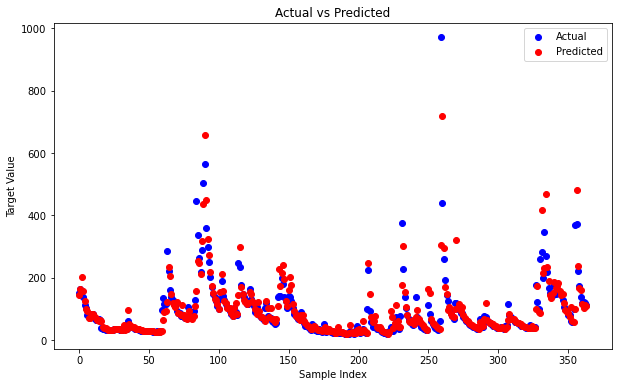

In [10]:
# 假设 y_test 是测试集的实际目标值，y_pred 是模型预测的目标值
# 这里假设 y_test 和 y_pred 都是一维数组，包含了每个样本的目标值

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制预测结果和实际结果的对比图
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')  # 实际结果用蓝色散点表示
plt.scatter(np.arange(len(y_pred_mlp)), y_pred_mlp, color='red', label='Predicted')  # 预测结果用红色散点表示

# 添加图例和标签
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')

# 显示图形
plt.show()

In [16]:
# 假设 y_pred_mlp 是模型在测试集上的预测结果，dates_test 是测试集对应的日期序列

# 创建包含预测结果和日期的 DataFrame
results_df = pd.DataFrame({
    'Date': 0,  # 日期列
    'Predicted_Value': y_pred_mlp  # 预测结果列
})

# 将 DataFrame 存储为 CSV 文件
results_df.to_csv('predicted_results.csv', index=False)

print("Predicted results saved to 'predicted_results.csv'.")


Predicted results saved to 'predicted_results.csv'.


In [17]:
# 构建支持向量机（SVM）模型
svm = SVR()

# 定义网格搜索的参数空间
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# 使用Grid Search CV进行超参数调优
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)

# 打印最佳参数和最佳得分
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation MSE:", -grid_search_svm.best_score_)

# 在测试集上评估模型
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Test MSE for SVM:", mse_svm)


Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best cross-validation MSE: 3484.401574773487
Test MSE for SVM: 3579.6484291566053


In [18]:
from sklearn.metrics import r2_score

r2_svm = r2_score(y_test, y_pred_svm)
print("R-squared score for SVM:", r2_svm)


R-squared score for SVM: 0.5734210294779467


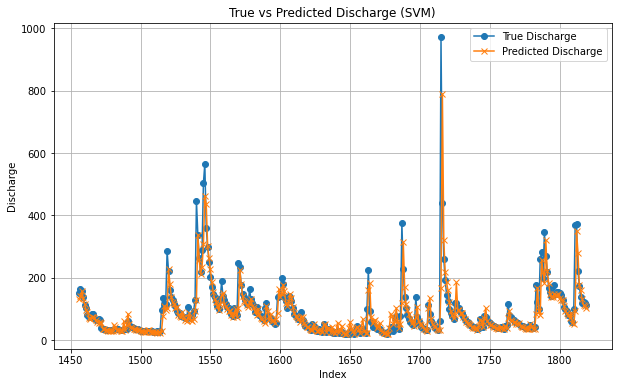

In [19]:
import matplotlib.pyplot as plt

# 将测试集中的真实流量和预测流量放入DataFrame中
results = pd.DataFrame({'True Discharge': y_test, 'Predicted Discharge': y_pred_svm})

# 绘制真实流量与预测流量的折线图
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['True Discharge'], label='True Discharge', marker='o')
plt.plot(results.index, results['Predicted Discharge'], label='Predicted Discharge', marker='x')
plt.xlabel('Index')
plt.ylabel('Discharge')
plt.title('True vs Predicted Discharge (SVM)')
plt.legend()
plt.grid(True)
plt.show()
